# Cubestat motion in the deployer

Vadim Yudintsev / [www.classmech.ru](www.classmech.ru) / 2019

_Here is an example of using Python language with numpy, scipy, sympy, and matplotlib libraries to build and integrate the  motion equations of a cubesat in the deployer._

![](https://www.isispace.nl/wp-content/uploads/2016/02/ISIPOD.png)

[ISIPOD CubeSat Deployer](https://www.isispace.nl/product/isipod-cubesat-deployer/)

## Model description

Let us consider a simple in-plane model of cubesat motion inside the deployer. The figure below shows the deployer $A_0OB_0D_0$, and the cubesat ADBE. 

The motion  of the cubesat is constrained by the guides $B_0D_0$ and $OA_0$ of the deployer. The cubesat slides along the guide $B_0D_0$ (contact point $B$), and the edge $A_0$ of the deployer can touch the bottom surface of the deployer $DA$.

![Наноспутник](http://classmech.ru/assets/img/blog/cubesat.png)

The cubesat moves under the action of the spring force $P$ and reaction forces  $R_A$ and $R_B$. 

The motion of the cubesat can be divided into three stages: 

1 stage: $P>0$, $R_A>0$, $R_B>0$.

2 stage: $P>0$, $R_A=0$, $R_B>0$: contact in $B$ point only.

3 stage: $P=0$, $R_A=0$, $R_B=0$: free motion.

## Motion equations

The position of the cubesat in the deployer is defined relative to the coordinate system $Oy_0z_0$ associated with the deployer using three parameters: the coordinates of the cubesat's center of mass $y$, $z$ and the angle $\beta$ between the deployer's guide and the cubesat edge.

Taking into account the supposed change in the number of contact points during the motion, it is more convenient to write the equations using all three coordinates for all stages, supplementing these equations with the constraint equations for each stage.

Vector form of the center of mass motion equation is: 

$$
    m \vec{a} = \vec{R}_A + \vec{R}_B + \vec{P}
$$

where $m$ is the mass of the cubesat, $\vec{R}_A$, $\vec{R}_B$ are the reaction forces, $\vec{P}$ is the force of the spring pusher. We assume that the force $\vec P$ is applied in the middle of the rear surface of the cubseat and is directed along the $Oz_0$ axis. We neglect the friction acting on the cubesat as it slides inside the deloyer.

The equation of angular motion of the cubesat is

$$
J \ddot \beta = P (z_c \cos \beta + y_c \sin \beta) - R_A (DA-z_c) - R_B(z_c \cos \beta - (w/2 + y_c)\sin \beta)
$$

where $w = 100$ mm is the cubesat width, $y_c>0$, $0 \leq z_c \leq L$ are the coordinates of the cubesat center of mass relative to the rear surface of the cubesat. In the right side of this equation are the torques produced by the forces $P$, $R_A$ and $R_B$ relative to the center of mass of the cubesat.

Let us project the motion equation of the center of mass onto the $Oy_0$ and $Oz_0$ axes and supplement the result with the equation of angular motion:  

$$
\left\{
\begin{aligned}
& m \ddot y = R_A \cos \beta - R_B \\
& m \ddot z = P + R_A \sin \beta \\
& J \ddot \beta = P (z_c \cos \beta + y_c \sin \beta) - R_A (DA-z_c) - R_B(z_c \cos \beta - (w/2 + y_c)\sin \beta) \\
\end{aligned}
\right.
$$

Matrix form of these equations is

$$
\begin{pmatrix}
m & 0 & 0 & - \cos \beta & 1 \\
0 & m & 0 & - \sin \beta & 0 \\
0 & 0 & J & DA-z_c & z_c \cos \beta - (w/2 + y_c)\sin \beta 
\end{pmatrix}
\begin{pmatrix}
\ddot y \\
\ddot z \\
\ddot \beta \\
R_A \\
R_B 
\end{pmatrix} = \begin{pmatrix} F_y \\ F_z \\ M_x\end{pmatrix}
$$ 

This system of 3 differential equations for $y$, $z$ and the angle $\beta$ includes 2 unknown reaction forces $R_A$ and $R_B$. To solve this system we have to supplement with the constraint equations.

## Constraint equations

### Constraint equation for point B

If $B$ point slide along the line $B_0D_0$, the coorinate $y_B$ equal to $w+d$:

$$
y_B = w + d
$$

$y_B$ depends on the coorinates of the center of mass of the cubesat and the angle $\beta$

$$
    \boxed{y + y_c \cos \beta + z_c \sin \beta + w/2 \cos \beta = w + d}        
$$

This equation reflects the relationship between $y$ coordinate of the center of mass and the angle $\beta$. This equation can be written as: 

$$
    f_B = 0,
$$

where

$$
    f_B = y + z_c \sin \beta + (w/2 + y_c) \cos \beta - w - d 
$$

### Constraint equation for point "A"

If the cubesat contacts with the deployer in point $A_0$ then: 

$$
    w \cos \beta + DA' \sin \beta = w + d,   
$$    

and in this case coordinate $z$ of the point $A'$ should be equal to $OA_0$:

$$
    z_A' = z_B - w \sin \beta + DA' \cos \beta = OA_0  
$$

So the constraint equation has the form:

$$
    w \cos \beta + \frac{OA_0 - z_B + w \sin \beta}{\cos \beta} \sin \beta = w + d
$$

Substituting that expression into the expression for $z_B$:

$$
    z_B = z + y_c \sin \beta - z_c \cos \beta + (w/2)\cdot \sin \beta  
$$

we get:

$$
    \boxed{w \cos^2 \beta + (OA_0 - z + z_c \cos \beta + (w/2-y_c) \sin \beta) \sin \beta = (w + d) \cos \beta}
$$

or 

$$
    f_A = 0
$$

where 

$$
    f_A = w \cos^2 \beta + [OA_0 - z + z_c \cos \beta + (w/2-y_c) \sin \beta] \sin \beta - (w + d) \cos \beta 
$$

$OA_0$ is obtained from the initital conditions. It is supposed, that the cubesat starts from the position with $z_B = 0$, and edge $A$ of the cubesat  coincides with the edge $A_0$ of the deployer:

$$
    OA_0 = L \cos \beta_0 - w \sin \beta_0
$$

wherein

$$
    w \cos \beta_0 + L \sin \beta_0 = w + d
$$

From this equation the initial angle $\beta_0$ can be found. Further we denote:

$$
    L_d = OA_0
$$

## Spring force

Spring force P, depends on the position of the cubesat in the deployer. It is assumed that, P depend on the coordinate  $z_B$ of the point $B$:

$$
P =
\begin{cases}
P_0 - \frac{P_0-P_k}{h} \cdot z_b & z_b \leq h \\
0 & z_b > h
\end{cases}
$$

where $P_0$ is the initial spring force, $P_k$ is the end spring force, $h$ is the spring stroke. 

## Differential-algebraic equations

To integrate motion equations with constraint equations we can get second derivative of the constraint equations. The second derivative of the constraint equation $f_A =0$: 

$$
   \frac{d^2f_A}{dt^2} =  \frac{\partial f_A}{\partial y} \ddot y + \frac{\partial f_A}{\partial z} \ddot z + \frac{\partial f_A}{\partial \beta} \ddot \beta + \Phi_A = 0 
$$

where

$$
\Phi_A = \frac{\partial^2 f_A}{\partial y^2} \dot y^2 + \frac{\partial^2 f_A}{\partial z^2} \dot z^2 + \frac{\partial^2 f_A}{\partial \beta^2} \dot \beta^2 + 2 \frac{\partial^2 f_A}{\partial y \partial z} \dot y \dot z + 2 \frac{\partial^2 f_A}{\partial y \partial \beta} \dot y \dot \beta + 2 \frac{\partial^2 f_A}{\partial z \partial \beta} \dot z \dot \beta
$$

New constraint equation can be writtes in a matrix form:

$$
    Q_A \ddot{q} = \Phi_A
$$

or

$$
\begin{bmatrix} Q_{Ay} & Q_{Az} & Q_{A\beta} \end{bmatrix} \cdot \begin{bmatrix} \ddot y \\ \ddot z \\ \ddot \beta \end{bmatrix} = \Phi_A 
$$

where 

$$
Q_{Ay} =  \frac{\partial f_A}{\partial y}, \quad Q_{Az} =  \frac{\partial f_A}{\partial z}, \quad Q_{A\beta} =  \frac{\partial f_\beta}{\partial \beta}
$$

The motion equations with the constraint equations form a differential-algebraic equations:

$$
\begin{pmatrix}
m & 0 & 0 & - \cos \beta & 1 \\
0 & m & 0 & - \sin \beta & 0 \\
0 & 0 & J & DA-z_c & z_c \cos \beta - (w/2 + y_c)\sin \beta  \\
Q_{Ay} & Q_{Az} & Q_{A\beta} & 0 & 0 \\
Q_{By} & Q_{Bz} & Q_{B\beta} & 0 & 0 
\end{pmatrix}
\begin{pmatrix}
\ddot y \\
\ddot z \\
\ddot \beta \\
R_A \\
R_B \\
\end{pmatrix} = \begin{pmatrix} F_y \\ F_z \\ M_x \\ \Phi_A \\ \Phi_B  \end{pmatrix}
$$ 

The initial conditions fo this system satisfy the conditions:

$$
    ({f_A})_{t=0} = 0, \quad \left(\frac{d f_A}{dt}\right)_{t=0} = 0, \quad ({f_B})_{t=0} = 0, \quad \left(\frac{d f_B}{dt}\right)_{t=0} = 0, 
$$

### Turning-off the constraints

In [ ]:
Связи, ограничивающие движение наноспутника, являются неудерживающими, поэтому в процессе интегрирования уравнений движения необходимо контролировать значения сил реакций в точках контакта и в момент изменении знака силы реакции "выключать" соответсвующее этой реакции уравнение связи. Удобней всего сделать это "выключение" связи заменой исходного уравнения связи. 

While $R_A>0$ we use the contraint equation:

$$
\begin{bmatrix} Q_{Ay} & Q_{Az} & Q_{A\beta} \end{bmatrix} \cdot \begin{bmatrix} \ddot y \\ \ddot z \\ \ddot \beta \end{bmatrix} = \Phi_A 
$$

When $R_A$ value crosses zero the constraint equartion is replaced to

$$
R_A = 0.
$$

So the motion eqiuations for the second stage are

$$
\begin{pmatrix}
m & 0 & 0 & - \cos \beta & 1 \\
0 & m & 0 & - \sin \beta & 0 \\
0 & 0 & J & DA-z_c & z_c \cos \beta - (w/2 + y_c)\sin \beta  \\
0 & 0 & 0 & 1 & 0 \\
Q_{By} & Q_{Bz} & Q_{B\beta} & 0 & 0 
\end{pmatrix}
\begin{pmatrix}
\ddot y \\
\ddot z \\
\ddot \beta \\
R_A \\
R_B \\
\end{pmatrix} = \begin{pmatrix} F_y \\ F_z \\ M_x \\ 0 \\ \Phi_B  \end{pmatrix}
$$ 

On this stage the cubesat has contact with the deployer at point $B$ only. 

During the second stage we should monitor the value of the reaction force $R_B$. When $R_B=0$ the constraint equation for $B$ point is replaced to

$$
R_B = 0
$$

Motion eqiuations for the third stage are

$$
\begin{pmatrix}
m & 0 & 0 & - \cos \beta & 1 \\
0 & m & 0 & - \sin \beta & 0 \\
0 & 0 & J & DA-z_c & z_c \cos \beta - (w/2 + y_c)\sin \beta  \\
0 & 0 & 0 & 1 & 0 \\
0 & 0 & 0 & 0 & 1 \\
\end{pmatrix}
\begin{pmatrix}
\ddot y \\
\ddot z \\
\ddot \beta \\
R_A \\
R_B \\
\end{pmatrix} = \begin{pmatrix} F_y \\ F_z \\ M_x \\ 0 \\ 0  \end{pmatrix}
$$ 

## Code

In [1]:
# Symbolic math
import sympy as sp

# for fast substitution
from sympy.utilities.lambdify import lambdify

# nice equations
sp.init_printing()

# matrices 
import numpy as np

# root
from scipy import optimize
# solve
from scipy import linalg

# ODE
from scipy.integrate import solve_ivp

# graph
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.pylab as pylab

# style
pylab.rcParams.update({'legend.fontsize': 14, 
                       'figure.figsize': (12, 8), 
                       'axes.labelsize': 14,
                       'axes.titlesize':14, 
                       'xtick.labelsize':14,
                       'ytick.labelsize':14})

In [2]:
# Center of mass position (yc, zc), cubesat width (w) and time (t)
yc, zc, w, t = sp.symbols('y_c z_c w t')

# Spring pusher parameters
P0, Pk, h = sp.symbols('P_0 P_k h')

# coordinates
y    = sp.Function('y')
z    = sp.Function('z')
beta = sp.Function('beta')

# Z coordinate of the point B
zb = z(t) + yc*sp.sin(beta(t)) - zc*sp.cos(beta(t)) + w*sp.sin(beta(t))/2  

# Spring force that depends on Zb
# Piecewise function
P = sp.Piecewise( (P0-(P0-Pk)*zb/h, zb <= h), (0, zb>h) )

In [3]:
# Cubesat length (L), gap between the cubesat and the deployer(d), initital angle (beta0)
L, d, beta0 = sp.symbols('L d beta_0')

# Cubesat length -- OA_0
Ld = L*sp.cos(beta0) - w*sp.sin(beta0) 

In [4]:
# Mass and the moment of inertia of the cubesat
m, J = sp.symbols('m, J')

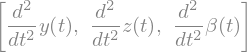

In [5]:
# Vector of the cubesat coordinates
q  = [y(t), z(t), beta(t)]

# velocities
dq = [sp.diff(var,t) for var in q]

# accelerations
d2q = [sp.diff(var,t) for var in dq]
d2q

### Forces and torques

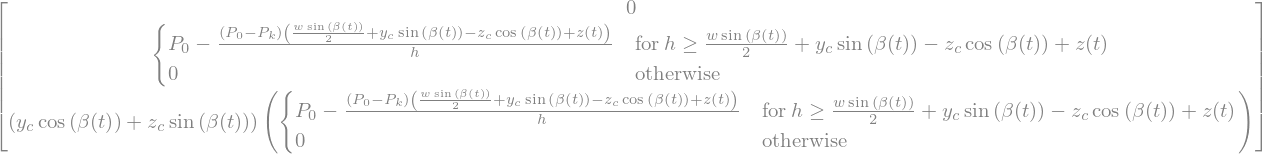

In [6]:
# Forces column matrix [Fy Fz Mx] (except reaction forces)
FyzMx = sp.Matrix([0,P,P*(zc*sp.sin(beta(t)) + yc*sp.cos(beta(t)))]) 
FyzMx

### Constraints equations

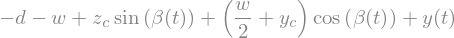

In [7]:
# For point B
f_B = y(t) + zc * sp.sin(beta(t)) + (w/2 + yc)*sp.cos(beta(t)) - w - d
f_B

In [8]:
# For point А'
f_A = w*sp.cos(beta(t))**2 + (Ld-z(t)+zc*sp.cos(beta(t))+0*(w/2-yc)*sp.sin(beta(t)))*sp.sin(beta(t))-(w+d)*sp.cos(beta(t))
f_A

In [9]:
# Second derivatives 
d2f_B = sp.diff(f_B,t,2)
d2f_A = sp.diff(f_A,t,2)

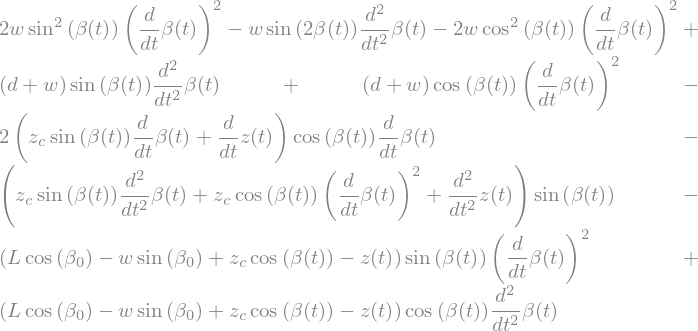

In [10]:
# Let's try to simplify
d2f_A.simplify()

Matrix of the coefficients of the acceleration terms in the constraint equation $d^2f_A/dt^2 = 0$. It is a row-matrix $Q_A = [Q_{Ay}, Q_{Az}, Q_{A\beta}]$:

In [11]:
QA = [ d2f_A.expand().coeff(var) for var in d2q ]
QA

Matrix of the coefficients of the acceleration terms in the constraint equation $d^2f_B/dt^2 = 0$. It is a row-matrix $Q_B = [Q_{By}, Q_{Bz}, Q_{B\beta}]$:

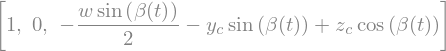

In [12]:
QB = [ d2f_B.expand().coeff(var) for var in d2q ]
QB

There are all term that do not depend on the accelerations in the right side of the equations. We extract these terms usinf [as_independent](https://docs.sympy.org/latest/modules/core.html#sympy.core.expr.Expr.as_independent) method. $\Phi_B$:

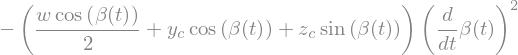

In [13]:
Phi_B = d2f_B.expand().as_independent(*d2q)[0].simplify()
Phi_B

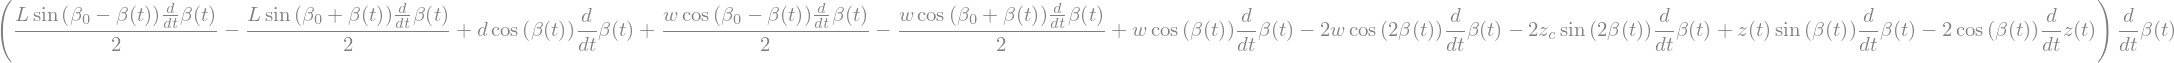

In [14]:
Phi_A = d2f_A.expand().as_independent(*d2q)[0].simplify()
Phi_A

## From symbolic to numeric 

In the analytical expressions obtained above, during numerical integration, it is necessary to replace symbols with their corresponding numerical values. To replace, you can use the subs method of the sympy expression, for example, to substitute the values $w = 0.1$ and $y_c = 0$ into the Phi_B expression, you can call the subs method, passing it a list of replacements:

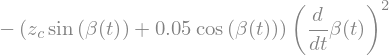

In [15]:
Phi_B.subs([ [w, 0.1], [yc, 0.0] ])

This function accept dict also:

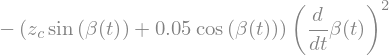

In [16]:
Phi_B.subs({w: 0.1, yc: 0.0})

The fastest way is to use the [lambdify](https://docs.sympy.org/latest/modules/utilities/lambdify.html) function. Let us take, for example, the expression Phi_B, which depends on the angle of rotation, angular velocity of the nanosatellite and the parameters w, yc, zc

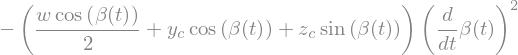

In [17]:
Phi_B

Using the lambdify function, we define a function that evaluates the value of this expression for the given numeric parameters. The first argument to the lambdify function is a list of sybbols that are contained in the evaluated expression, the second argument is the symbolic fucntion.

In [18]:
n_Phi_B = lambdify( [beta(t), sp.diff(beta(t),t), w, yc, zc], Phi_B )

The result of lambdify is an object of type function that can be called with given numeric values

In [19]:
n_Phi_B(0.1,0.1,0.01,0.1,0.1)

For convenience, in order not to manually enumerate the parameters of expressions, we define a list that will include the state vector of the nanosatellite $q = (y, z, \beta, \dot{y}, \dot{z}, \dot{\beta})$ and its parameters. This list will be a list of arguments of all computed functions that will be built from symbolic expressions using [lambdify](https://docs.sympy.org/latest/modules/utilities/lambdify.html)

In [20]:
# Paramaters list

# A 3U nanosatellite with a mass of 3 kg, with a center of mass,
# offset 10 mm from the longitudinal axis and 50 mm from the middle to the pusher
# Maximum gap between nanosatellite and container 1 mm
# The pusher works on a stroke of 220 mm
params = {m: 3.0, J: 0.021, L: 0.340, w: 0.100, d: 0.001, yc: 0.010, zc: 0.340/2.0 - 0.05, P0: 7, Pk: 2, h: 0.220}


def get_q0(params):
    '''
    This function determines the initial position of the cubesat in the deployer
    for a given length L, width w and the maximum gap d,
    assuming that at t=0 point B coincides with exact B0, and point A with point A0
    '''
    f = (w*sp.cos(beta0)+L*sp.sin(beta0) - w - d).subs(params)    
    b0 = optimize.root(lambda x: f.subs({beta0:x}), 0.0, tol=1e-8).x[0]
    y0 = ((w+d) - 0.5*w*np.cos(b0)-zc*np.sin(b0)-yc*np.cos(b0)).subs(params)
    z0 = (-0.5*w*np.sin(b0)+zc*np.cos(b0)-yc*np.sin(b0)).subs(params)
    return [y0, z0, b0]


# The vector of initial conditions depending on the parameters of the nanosatellite and the container
q0 = get_q0(params)
# Add to this list zero initial velocities
q0.extend([0.0,0.0,0.0])
# Let's add the calculated value beta_0 to the parameter dictionary
params[beta0] = q0[2]

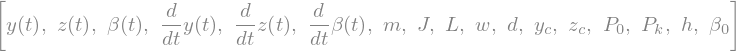

In [21]:
# and now let's define a combined list of state variables and parameters
state_and_params = [*q,*dq,*params.keys()]
state_and_params

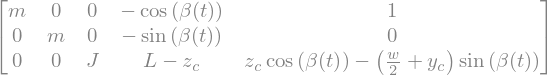

In [22]:
# The first three rows of the matrix of coefficients of the right-hand side of the equations of motion
# Symbolic expression sympy (matrix)
mass_matrix = sp.Matrix([[m, 0, 0, -sp.cos(beta(t)), 1],
                         [0, m, 0, -sp.sin(beta(t)), 0],
                         [0, 0, J, L-zc, zc*sp.cos(beta(t))-(w/2+yc)*sp.sin(beta(t))]])

# lambdify mass_matrix
n_mass_matrix = lambdify(state_and_params, mass_matrix)

# Symbolic expression
mass_matrix

In [23]:
# Mass matrix for the initital state 
n_mass_matrix(*[*q0,*params.values()])

array([[ 3.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -9.99995671e-01,  1.00000000e+00],
       [ 0.00000000e+00,  3.00000000e+00,  0.00000000e+00,
        -2.94244971e-03,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  2.10000000e-02,
         2.20000000e-01,  1.19822934e-01]])

In [24]:
# Matrix of the coefficients for constraints equations
Q_matrix = sp.Matrix([QA, QB])
# lambdify it
n_Q_matrix = lambdify(state_and_params, Q_matrix)

In [25]:
# Right side of the constraints equations
Phi_matrix = sp.Matrix([-Phi_A, -Phi_B])
# lambdify it
n_Phi_matrix = lambdify(state_and_params, Phi_matrix)

In [26]:
# Forces and torques (except the constraints)
n_FyzMx = lambdify(state_and_params,FyzMx)

# z coordinate of the point B
n_zb = lambdify(state_and_params, zb)

In [27]:
# Matrix of the coefficients of the equations 
def get_A_matrix(t, qt, params, stage):
    A = np.zeros((5,5),dtype=float)
    A[0:3,:]   = n_mass_matrix(*[*qt,*params.values()])
    A[3:5,0:3] = n_Q_matrix(*[*qt,*params.values()])
    if stage == 2:
        # RA = 0
        A[3,:] = 0
        A[3,3] = 1       
    if stage == 3:
        # RA = 0 и RB = 0
        A[3,:] = 0
        A[4,:] = 0
        A[4,4] = 1       
        A[3,3] = 1    
    return A
# Matrix of the right side of the equations     
def get_B_matrix(t, qt, params, stage):
    B = np.zeros((5,1), dtype=float)
    B[0:3] = n_FyzMx(*[*qt,*params.values()])
    B[3:5] = n_Phi_matrix(*[*qt,*params.values()])    
    if stage == 2:
        # RA = 0
        B[3] = 0 
    if stage==3:
        # RA = 0 и RB = 0
        B[3] = 0
        B[4] = 0 
    return B    

## Numeric integration

#### Right-side function

In [28]:
def dydt(t,y):
    A = get_A_matrix(t, y, params, STAGE)
    B = get_B_matrix(t, y, params, STAGE)
    # Solve A*X=B
    X = linalg.solve(A,B.flatten())        
    res = np.zeros(len(y), dtype=float)
    # copy velociies 
    res[0:3] = y[3:6]
    # and write the accelerations to the result array    
    res[3:6] = X[0:3]
    return res

#### Event function

In [29]:
def Ra_eq_0(t, y):
    # This function stops the integration process 
    # when Ra = 0 -- Transistion from Stage 1 to 2
    A = get_A_matrix(t, y, params, STAGE)    
    B = get_B_matrix(t, y, params, STAGE)
    X = linalg.solve(A,B.flatten())   
    return X[3]
# event-function is active
Ra_eq_0.terminal  = True
# Function catches the event Ra = 0 when Ra is decreasing 
Ra_eq_0.direction = -1

def Rb_eq_0(t, y):
    # Функция-"детектор", передаваемая в интегратор (параметр events), 
    # для остановки процесса интегрирования    
    # при Rb = 0 -- переход от этапа движения 2 к этапу 3
    A = get_A_matrix(t, y, params, STAGE)    
    B = get_B_matrix(t, y, params, STAGE)
    X = linalg.solve(A,B.flatten())      
    return X[4]

# Function catches the event Rb = 0 when Rb is decreasing
Rb_eq_0.direction = -1
# event-function is active
Rb_eq_0.terminal  = True

In [37]:
STAGE = 1
# While Ra > 0
sol_1 = solve_ivp(dydt, [0, 0.5], q0, events = [Ra_eq_0], 
                  rtol = 1e-6, method="LSODA",minstep=0.005)

STAGE = 2
# While Rb > 0
sol_2 = solve_ivp(dydt, [sol_1.t[-1], sol_1.t[-1]+0.5], sol_1.y[:,-1], events = [Rb_eq_0], 
                  rtol = 1e-6, method="LSODA", minstep=0.005)

STAGE = 3
# Free motion
sol_3 = solve_ivp(dydt, [sol_2.t[-1], sol_2.t[-1]+0.5], sol_2.y[:,-1], 
                  rtol = 1e-6, method="LSODA", minstep=0.01)

#### V_z velocity

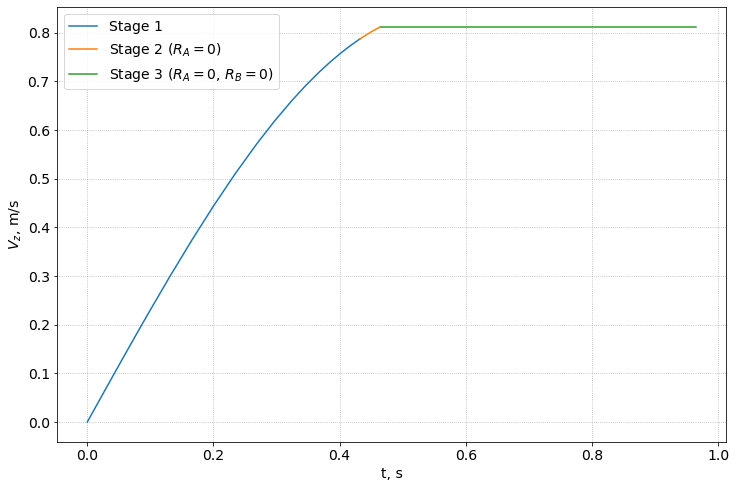

In [38]:
plt.plot(sol_1.t, sol_1.y[4]);
plt.plot(sol_2.t, sol_2.y[4]);
plt.plot(sol_3.t, sol_3.y[4]);
plt.xlabel('t, s');
plt.ylabel('$V_z$, m/s');
plt.grid(linestyle=':')
plt.legend(['Stage 1','Stage 2 ($R_A=0$)','Stage 3 ($R_A=0$, $R_B=0$)']);

#### Angular velocity

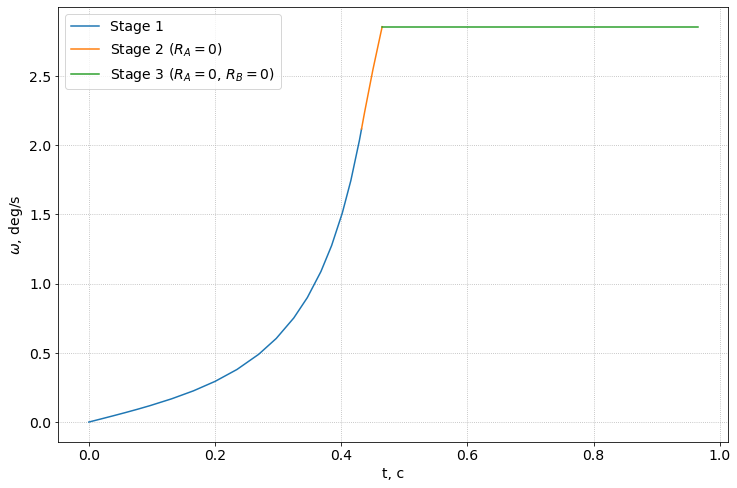

In [39]:
plt.plot(sol_1.t, sol_1.y[5]*180/np.pi);
plt.plot(sol_2.t, sol_2.y[5]*180/np.pi);
plt.plot(sol_3.t, sol_3.y[5]*180/np.pi);
plt.xlabel('t, c');
plt.ylabel('$\omega$, deg/s');
plt.grid(linestyle=':')
plt.legend(['Stage 1','Stage 2 ($R_A=0$)','Stage 3 ($R_A=0$, $R_B=0$)']);

#### Constraint equation 

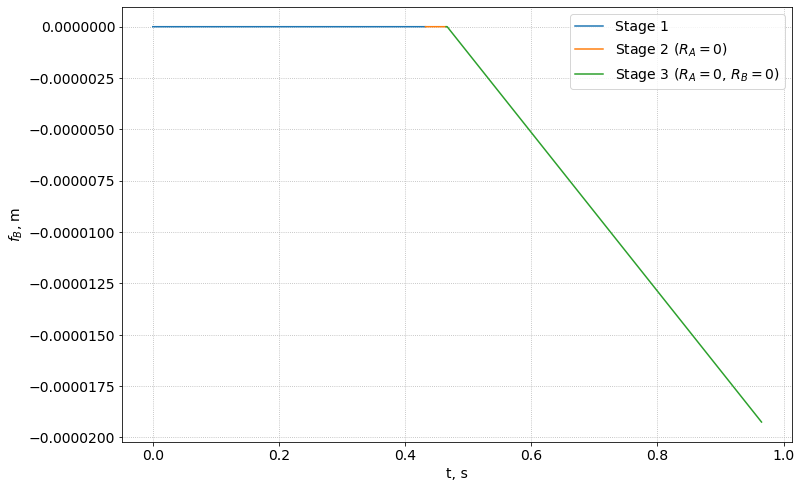

In [40]:
n_f_B=lambdify(state_and_params, f_B)
sol_f_B = [ [ n_f_B(*[*yi,*params.values()]) for yi in sol.y.transpose()] for sol in (sol_1,sol_2,sol_3) ]

plt.plot(sol_1.t, sol_f_B[0]);
plt.plot(sol_2.t, sol_f_B[1]);
plt.plot(sol_3.t, sol_f_B[2]);
plt.xlabel('t, s');
plt.ylabel('$f_B$, m');
plt.grid(linestyle=':')
plt.legend(['Stage 1','Stage 2 ($R_A=0$)','Stage 3 ($R_A=0$, $R_B=0$)']);

# Constraint equation fB = 0 is active on the stages 1 and 2 

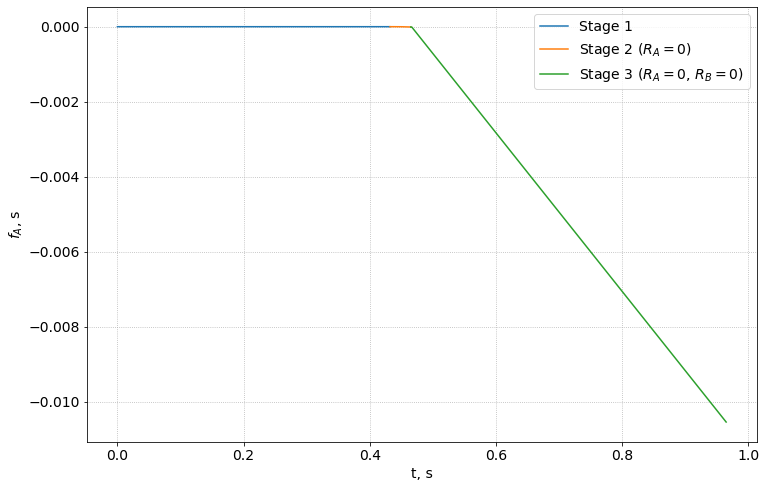

In [34]:
n_f_A=lambdify(state_and_params, f_A)
sol_f_A = [ [ n_f_A(*[*yi,*params.values()]) for yi in sol.y.transpose()] for sol in (sol_1,sol_2,sol_3) ]

plt.plot(sol_1.t, sol_f_A[0]);
plt.plot(sol_2.t, sol_f_A[1]);
plt.plot(sol_3.t, sol_f_A[2]);
plt.xlabel('t, s');
plt.ylabel('$f_A$, s');
plt.grid(linestyle=':')
plt.legend(['Stage 1','Stage 2 ($R_A=0$)','Stage 3 ($R_A=0$, $R_B=0$)']);

# Constraint fa = 0 is active on the first stage

#### Coordinate z of the point B: $z_B$

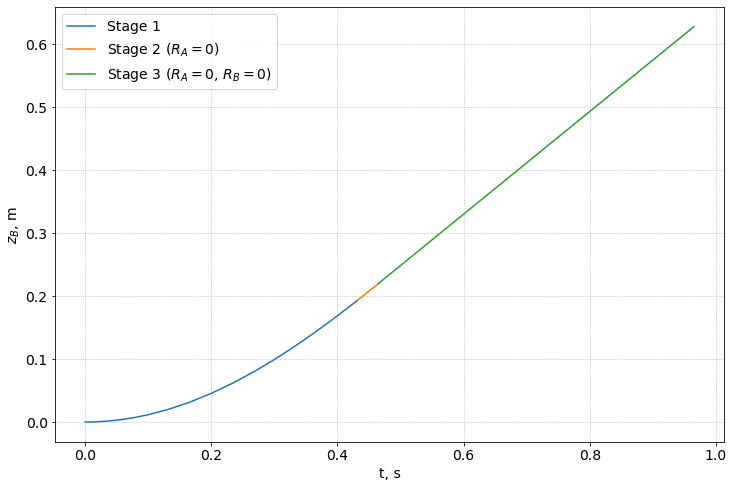

In [35]:
sol_zb = [ [ n_zb(*[*yi,*params.values()]) for yi in sol.y.transpose()] for sol in (sol_1,sol_2,sol_3) ]

plt.plot(sol_1.t, sol_zb[0]);
plt.plot(sol_2.t, sol_zb[1]);
plt.plot(sol_3.t, sol_zb[2]);
plt.xlabel('t, s');
plt.ylabel('$z_B$, m');
plt.grid(linestyle=':')
plt.legend(['Stage 1','Stage 2 ($R_A=0$)','Stage 3 ($R_A=0$, $R_B=0$)']);


#### Spring pusher force

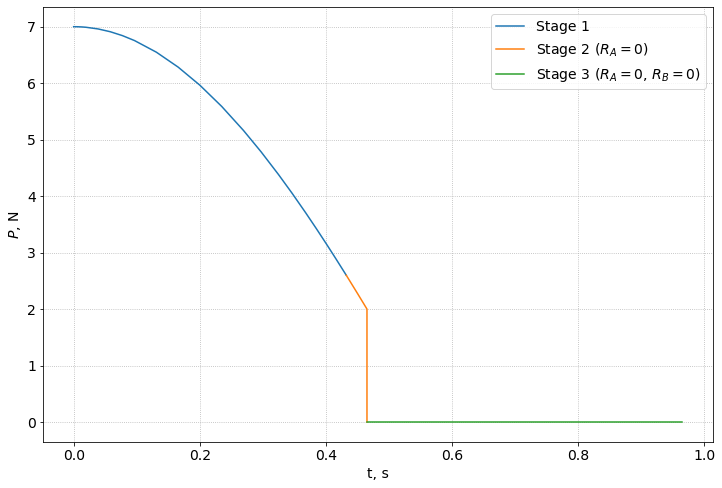

In [36]:
n_P = lambdify(state_and_params, P)

sol_P = [ [ n_P(*[*yi,*params.values()]) for yi in sol.y.transpose()] for sol in (sol_1,sol_2,sol_3) ]

plt.plot(sol_1.t, sol_P[0]);
plt.plot(sol_2.t, sol_P[1]);
plt.plot(sol_3.t, sol_P[2]);
plt.xlabel('t, s');
plt.ylabel('$P$, N');
plt.grid(linestyle=':')
plt.legend(['Stage 1','Stage 2 ($R_A=0$)','Stage 3 ($R_A=0$, $R_B=0$)']);